# Importing Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('StudentsPerformance.csv')

# Exploring The Data

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
768,female,group D,some high school,standard,none,68,71,75
126,male,group B,some high school,standard,none,72,68,67
121,male,group B,associate's degree,standard,completed,91,89,92
461,male,group B,some college,free/reduced,none,54,54,45
665,female,group C,some high school,free/reduced,completed,50,60,60
314,female,group C,bachelor's degree,standard,completed,59,64,75
365,male,group A,bachelor's degree,free/reduced,completed,49,58,60
979,female,group C,associate's degree,standard,none,91,95,94
193,male,group D,some college,standard,completed,77,62,62
480,male,group B,high school,standard,completed,73,71,68


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# Graphs

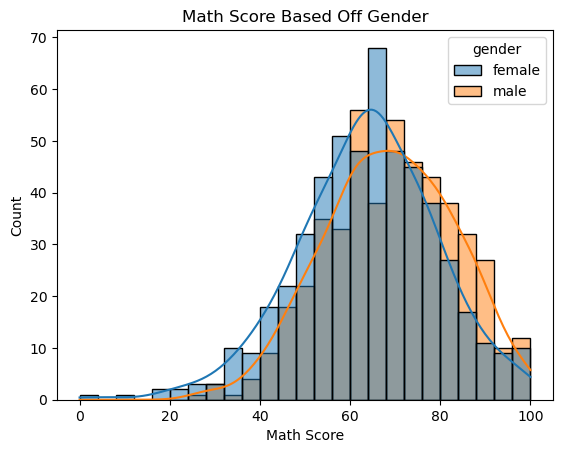

In [9]:
sns.histplot(data=df,x='math score',hue='gender',kde=True)
plt.title("Math Score Based Off Gender")
plt.xlabel("Math Score")
plt.ylabel("Count")
plt.show()

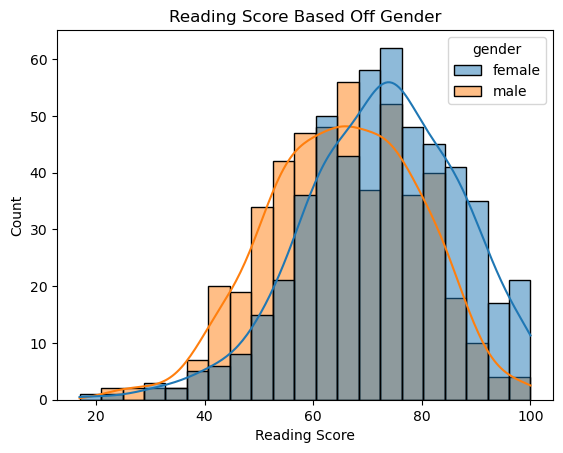

In [10]:
sns.histplot(data=df,x='reading score',hue='gender',kde=True)
plt.title("Reading Score Based Off Gender")
plt.xlabel("Reading Score")
plt.ylabel("Count")
plt.show()

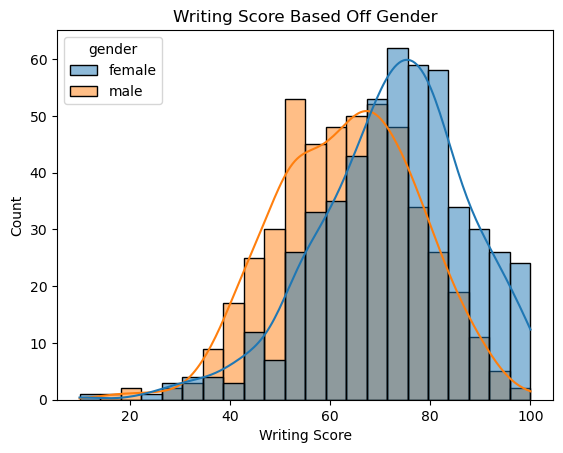

In [11]:
sns.histplot(data=df,x='writing score',hue='gender',kde=True)
plt.title("Writing Score Based Off Gender")
plt.xlabel("Writing Score")
plt.ylabel("Count")
plt.show()

/Users/brandonboyle/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='lunch', ylabel='math score'>

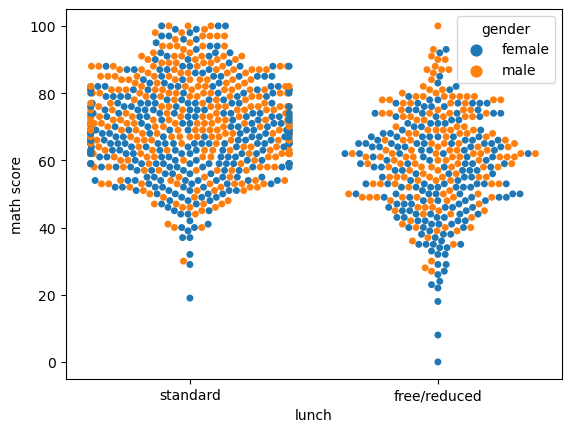

In [12]:
sns.swarmplot(x='lunch',
             y='math score',
             data=df,
             hue='gender')

/Users/brandonboyle/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='test preparation course', ylabel='writing score'>

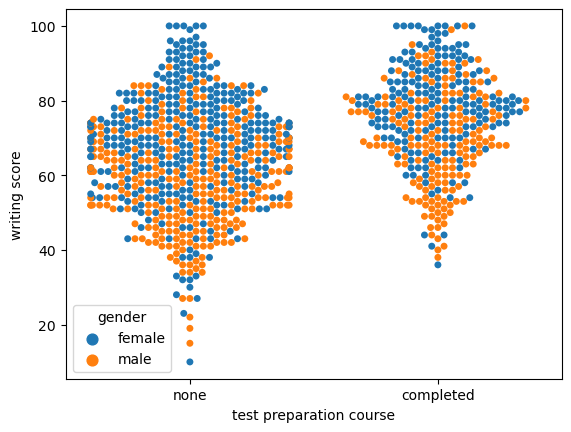

In [13]:
sns.swarmplot(x='test preparation course',
             y='writing score',
             data=df,
             hue='gender')

### Turning all the data to int

In [14]:
score=pd.get_dummies(df[['gender', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score']]).astype(int)

In [15]:
score.head()

,math score,reading score,writing score,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,1
1,69,90,88,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,1
3,47,57,44,0,1,1,0,0,1
4,76,78,75,0,1,0,1,0,1


# Correlation

In [16]:
score.corr()

,math score,reading score,writing score,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
math score,1.000000,0.817580,0.802642,-0.167982,0.167982,-0.350877,0.350877,0.177702,-0.177702
reading score,0.817580,1.000000,0.954598,0.244313,-0.244313,-0.229560,0.229560,0.241780,-0.241780
writing score,0.802642,0.954598,1.000000,0.301225,-0.301225,-0.245769,0.245769,0.312946,-0.312946
gender_female,-0.167982,0.244313,0.301225,1.000000,-1.000000,0.021372,-0.021372,-0.006028,0.006028
gender_male,0.167982,-0.244313,-0.301225,-1.000000,1.000000,-0.021372,0.021372,0.006028,-0.006028
lunch_free/reduced,-0.350877,-0.229560,-0.245769,0.021372,-0.021372,1.000000,-1.000000,0.017044,-0.017044
lunch_standard,0.350877,0.229560,0.245769,-0.021372,0.021372,-1.000000,1.000000,-0.017044,0.017044
test preparation course_completed,0.177702,0.241780,0.312946,-0.006028,0.006028,0.017044,-0.017044,1.000000,-1.000000
test preparation course_none,-0.177702,-0.241780,-0.312946,0.006028,-0.006028,-0.017044,0.017044,-1.000000,1.000000


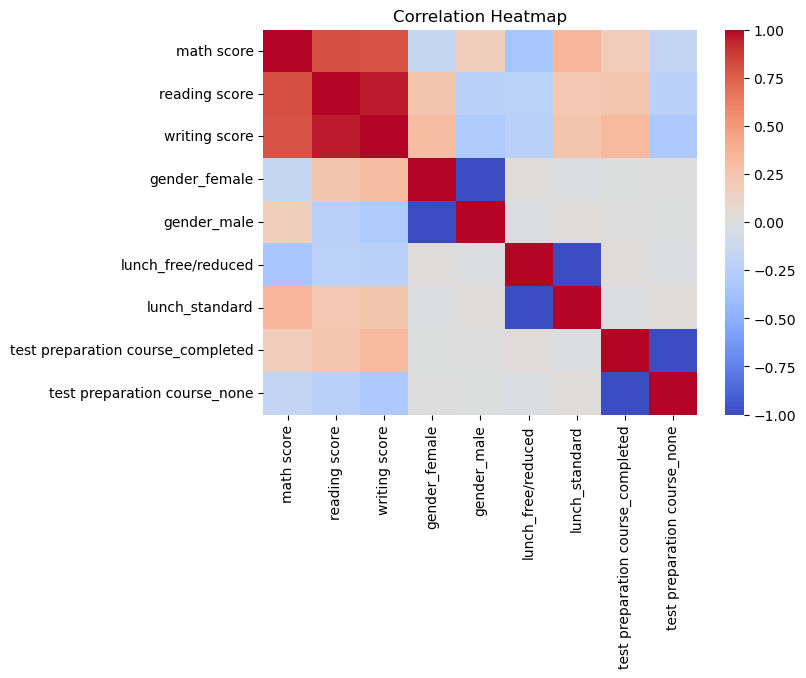

In [17]:
correlation_matrix = score.corr()

plt.figure(figsize=(7, 5))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()

# MLR

## For Math Score

In [18]:
score.columns

Index(['math score', 'reading score', 'writing score', 'gender_female',
       'gender_male', 'lunch_free/reduced', 'lunch_standard',
       'test preparation course_completed', 'test preparation course_none'],
      dtype='object')

In [19]:
x=score[['gender_male','gender_female', 'lunch_free/reduced', 'lunch_standard',
       'test preparation course_completed', 'test preparation course_none']]
y=score[['math score']]

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regressor=LinearRegression()

regressor.fit(x_train.values, y_train)

LinearRegression()

In [23]:
print(f"Coefficient: {regressor.coef_}")

Coefficient: [[ 2.06464166 -2.06464166 -5.68080844  5.68080844  3.05775189 -3.05775189]]


In [24]:
print(f"Intercept: {regressor.intercept_}")

Intercept: [65.38864241]


In [25]:
from sklearn.metrics import mean_squared_error, r2_score
import math

## - Predicting Math Scores -

In [26]:
y_pred=regressor.predict(x_test.values)

In [27]:
print(f"MSE: {mean_squared_error(y_test,y_pred):.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test,y_pred)):.2f}")
print(f"R-square: {r2_score(y_test,y_pred):.2f}")

MSE: 185.76
RMSE: 13.63
R-square: 0.18


In [28]:
x_test.head()

,gender_male,gender_female,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
993,0,1,1,0,0,1
859,1,0,1,0,0,1
298,1,0,1,0,1,0
553,1,0,1,0,0,1
672,0,1,0,1,0,1


#### Male, Lunch Free/Reduced, No Test Prep Course

In [29]:
regressor.predict([[1,0,1,0,0,1]])

array([[58.71472374]])

#### Male, Standard Lunch, Test Prep Course

In [30]:
regressor.predict([[1,0,0,1,1,0]])

array([[76.1918444]])

#### Female, Standard Lunch, No Test Prep Course

In [31]:
regressor.predict([[0,1,0,1,0,1]])

array([[65.94705731]])

#### Female, Lunch Free/Reduced, Test Prep Course

In [32]:
regressor.predict([[0,1,1,0,1,0]])

array([[60.70094419]])

## For Reading Score

In [33]:
x1=score[['gender_male','gender_female', 'lunch_free/reduced', 'lunch_standard',
       'test preparation course_completed', 'test preparation course_none']]
y1=score[['reading score']]

In [34]:
x1_train, x1_test, y1_train, y1_test=train_test_split(x1, y1, test_size=.20, random_state=0)

In [35]:
regressor=LinearRegression()

regressor.fit(x1_train.values, y1_train)

LinearRegression()

In [36]:
print(f"Coefficient: {regressor.coef_}")

Coefficient: [[-3.79175819  3.79175819 -3.75134312  3.75134312  3.89607616 -3.89607616]]


In [37]:
print(f"Intercept: {regressor.intercept_}")

Intercept: [69.1547548]


## - Predicting Reading Scores - 

In [38]:
y1_pred=regressor.predict(x1_test.values)

In [39]:
print(f"MSE: {mean_squared_error(y1_test, y1_pred):.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y1_test, y1_pred)):.2f}")
print(f"R-square: {r2_score(y1_test, y1_pred):.2f}")

MSE: 192.46
RMSE: 13.87
R-square: 0.12


#### Male, Lunch Free/Reduced, No Test Prep Course

In [40]:
regressor.predict([[1,0,1,0,0,1]])

array([[57.71557733]])

#### Male, Standard Lunch, Test Prep Course

In [41]:
regressor.predict([[1,0,0,1,1,0]])

array([[73.01041589]])

#### Female, Standard Lunch, No Test Prep Course

In [42]:
regressor.predict([[0,1,0,1,0,1]])

array([[72.80177996]])

#### Female, Lunch Free/Reduced, Test Prep Course

In [43]:
regressor.predict([[0,1,1,0,1,0]])

array([[73.09124602]])

## For Writing Score

In [44]:
x2=score[['gender_male','gender_female', 'lunch_free/reduced', 'lunch_standard',
       'test preparation course_completed', 'test preparation course_none']]
y2=score[['writing score']]

In [45]:
x2_train, x2_test, y2_train, y2_test=train_test_split(x2, y2, test_size=.20, random_state=0)

In [46]:
regressor=LinearRegression()

regressor.fit(x2_train.values, y2_train)

LinearRegression()

In [47]:
print(f"Coefficient: {regressor.coef_}")

Coefficient: [[-4.9191154   4.9191154  -4.19095476  4.19095476  5.33819301 -5.33819301]]


In [48]:
print(f"Intercept: {regressor.intercept_}")

Intercept: [68.20981747]


## - Predicting Writing Scores -

In [49]:
y2_pred=regressor.predict(x2_test.values)

In [50]:
print(f"MSE: {mean_squared_error(y2_test, y2_pred):.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y2_test, y2_pred)):.2f}")
print(f"R-square: {r2_score(y2_test, y2_pred):.2f}")

MSE: 192.63
RMSE: 13.88
R-square: 0.16


#### Male, Lunch Free/Reduced, No Test Prep Course

In [51]:
regressor.predict([[1,0,1,0,0,1]])

array([[53.76155432]])

#### Male, Standard Lunch, Test Prep Course

In [52]:
regressor.predict([[1,0,0,1,1,0]])

array([[72.81984984]])

#### Female, Standard Lunch, No Test Prep Course

In [53]:
regressor.predict([[0,1,0,1,0,1]])

array([[71.98169462]])

#### Female, Lunch Free/Reduced, Test Prep Course

In [54]:
regressor.predict([[0,1,1,0,1,0]])

array([[74.27617112]])